__Final Project__

# __Data Collection Process:__

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import random
import os
from sklearn.preprocessing import MinMaxScaler
from spotipy import Spotify 
from typing import List
import oauth2
from dotenv import load_dotenv

### __Loading Client Information:__

In [23]:
client_id = '5477354bc87a4af1b2b8b10e23998f8d'
client_secret = '124885a709a44f5b9f4c251458e19a22'

sp_cred = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)  
sp = spotipy.Spotify(auth_manager=sp_cred) 

### __Collecting Artist Data:__

In [11]:
def get_random_artists(limit=20, min_popularity=20, 
                                max_popularity=100):
    artist_list = []

    search_queries = [
        'cu', 'vu', 'bu', 'wu', 'ru', 
        'pu', 'qu', 'su', 'lu', 'nu']

    for query in search_queries:
        results = sp.search(q=f'artist:{query}', 
                            type='artist', market='US', 
                            limit=50, 
                            offset=random.randint(0, 950))
        for artist in results['artists']['items']:
            if min_popularity <= artist['popularity'] \
                <= max_popularity:
                artist_list.append(artist['name'])
                if len(artist_list) >= limit:
                    return artist_list[:limit]

    return artist_list[:limit]

# Fetch random artists
artists = get_random_artists()
print(artists)


['Ronnie Cuber', 'Ryan Culwell', 'Swim The Current', 'Death Cult', 'CurseWeb', 'Curtis Walsh', 'Cuatro Gatos', 'Cultural Roots', 'Cunnie Williams', 'Cuencos Tibetanos', 'Current Comfort', 'Los Hermanos Cuestas', 'Los Plebes de la Cuadra', 'Leftover Cuties', 'Leonardo Cupelli', 'Christian Cueva', 'Cuarto Grado', 'Clara Cuvé', 'The Curly', 'Cuerdas Colombianas']


### __Collecting Song Data:__

In [12]:
songs_data = []
for artist in artists:
    results = sp.search(q=f'artist:{artist}', 
                        type='track', limit=10)
    for track in results['tracks']['items']:

        # Get audio features for the track
        audio_features = sp.audio_features(track['id'])[0]

        # Get the popularity of the song and the artist
        song_name = track['name']
        song_popularity = track['popularity']
        artist_popularity = results['tracks']['items'][0]['popularity']
        
        print(f"track: {song_name}")

        # Exclude the main artist
        featured_artists = track['artists'][1:]  

        # Get the popularity of the first featured artist
        if featured_artists:
            first_featured_artist = featured_artists[0]['name']
            
            search_result = sp.search(q=f'artist:\
                    {first_featured_artist}', type='artist')
            if search_result['artists']['items']:
                items = search_result['artists']['items']
                
                first_featured_artist_popularity = items[0]\
                    ['popularity']
            else:
                first_featured_artist_popularity = None
        else:
            first_featured_artist = None
            first_featured_artist_popularity = None

        # Add the audio features
        if audio_features:
            id = track['id'],
            album = track['album']['name'],
            release_date = track['album']['release_date'],
            duration = track['duration_ms'],
            explicit = track['explicit'],
            danceability = audio_features['danceability'],
            energy = audio_features['energy'],
            key = audio_features['key'],
            loudness = audio_features['loudness'],
            mode = audio_features['mode'],
            speechiness = audio_features['speechiness'],
            acousticness = audio_features['acousticness'],
            instrumentalness = audio_features['instrumentalness'],
            liveness = audio_features['liveness'],
            valence = audio_features['valence'],
            tempo = audio_features['tempo']
        else:
            id = None
            album = None
            release_date = None
            duration = None
            explicit = None
            danceability = None
            energy = None
            key = None
            loudness = None
            mode = None
            speechiness = None
            acousticness = None
            instrumentalness = None
            liveness = None
            valence = None
            tempo = None
        
        # Add the data to the list
        songs_data.append({
            'Artist': artist,
            'Song': song_name,
            'Song Popularity': song_popularity,
            'Artist Popularity': artist_popularity,
            'Featured Artist': first_featured_artist,
            'Featured Artist Popularity': 
            first_featured_artist_popularity,
            'Track ID': id,
            'Album Name': album,
            'Release Date': release_date,
            'Duration (ms)': duration,
            'Explicit': explicit,
            'Danceability': danceability,
            'Energy': energy,
            'Key': key,
            'Loudness': loudness,
            'Mode': mode,
            'Speechiness': speechiness,
            'Acousticness': acousticness,
            'Instrumentalness': instrumentalness,
            'Liveness': liveness,
            'Valence': valence,
            'Tempo': tempo
            
        })

songs_df = pd.DataFrame(songs_data)

print(songs_df.head())

track: Passion Fruit


Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=4760YTvGff1alhNSX5qIlO:
 Max Retries, reason: too many 429 error responses

In [77]:
songs_df.size

17424

### __Data Cleaning__

In [78]:
# Columns to exclude from cleaning
exclude_columns = ['Artist', 'Song', 'Song Popularity', 'Artist Popularity', 'Featured Artist', 'Featured Artist Popularity']

# Function to clean the data
def clean_data(value):
    if isinstance(value, str):
        value = value.replace("(", "").replace(")", "").replace("'", "").replace(",", "")
    return value

# Apply cleaning function to all columns except the excluded ones
for col in songs_df.columns:
    if col not in exclude_columns:
        # Convert column to string before applying the cleaning function
        songs_df[col] = songs_df[col].astype(str).apply(clean_data)

# Save the cleaned DataFrame to CSV
songs_df.to_csv('tracks1.csv', index=False)

print(songs_df)

                                     Artist                            Song  \
0                              Curtis Walsh                   Full Recovery   
1                              Curtis Walsh            Perfect Rain - Remix   
2                              Curtis Walsh                    Perfect Rain   
3                              Curtis Walsh       Seven Seas (Konmak Remix)   
4                              Curtis Walsh                      Seven Seas   
..                                      ...                             ...   
787  Los Internacionales Nenes de la Cumbia  Tu Abandono / Perdonarte Jamás   
788  Los Internacionales Nenes de la Cumbia                    Sufro por Ti   
789  Los Internacionales Nenes de la Cumbia                 Marcado - Remix   
790  Los Internacionales Nenes de la Cumbia                   Parrandita 88   
791  Los Internacionales Nenes de la Cumbia       Guitarra Chichera - Remix   

     Song Popularity  Artist Popularity Featured Ar

## __Writing to CSV__

In [28]:
existing_df = pd.read_csv('track_data.csv')

# Drop all rows where any popularity score is less than 10
existing_df = existing_df[(existing_df['Song Popularity'] >= 20) & 
                          (existing_df['Artist Popularity'] >= 20) & 
                          (existing_df['Featured Artist Popularity'].fillna(20) >= 20) &
                          (existing_df['Song Popularity'] <= 90) & 
                          (existing_df['Artist Popularity'] <= 90) & 
                          (existing_df['Featured Artist Popularity'].fillna(10) <= 90)]

print(existing_df)

# Save the filtered DataFrame to CSV
existing_df.to_csv('track_data.csv', index=False)

                        Artist                     Song  Song Popularity  \
0                 Curtis Walsh            Full Recovery               31   
1                 Curtis Walsh     Perfect Rain - Remix               29   
2                 Curtis Walsh             Perfect Rain               29   
4                 Curtis Walsh               Seven Seas               23   
37                Cuatro Gatos  El Fantasma de la Ópera               34   
...                        ...                      ...              ...   
12414  Los Plebes de la Cuadra                  El Hats               26   
12462             Curtis Walsh            Full Recovery               31   
12463             Curtis Walsh             Perfect Rain               29   
12464             Curtis Walsh               Seven Seas               23   
12465             Curtis Walsh     Perfect Rain - Remix               29   

       Artist Popularity  Featured Artist  Featured Artist Popularity  \
0             

# Research Question

Can we predict how popular a track is based on how popular the artist and featured artists are?

## Model 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean sqaured error (artist): 101.57220424921118
training score for model (artist): 0.14834181086134346
testing score for model (artist): 0.14318535825077394


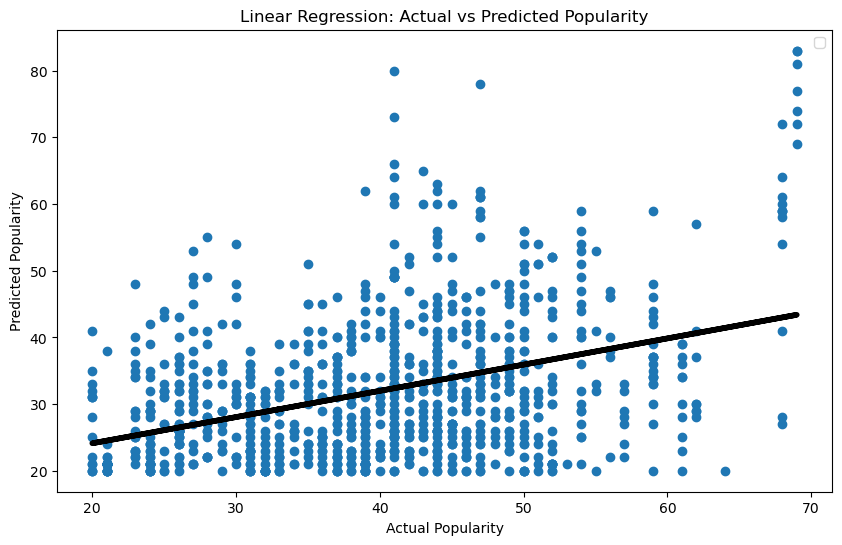

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import root_mean_squared_error

#Model for Artist Popularity 
model_artist = LinearRegression()

#Prepare data
df = pd.read_csv('track_data.csv')

x_artist = df[["Artist Popularity"]]
y_artist = df["Song Popularity"]
#Splits the data into training and testing sets
x_art_tr, x_art_te, y_art_tr, y_art_te = train_test_split(x_artist, y_artist, test_size=0.2, random_state=42)
#Fits model with training data
model_artist.fit(x_art_tr, y_art_tr)
#Predicts testing set based on model
art_pred = model_artist.predict(x_art_te)
#Calculates mean squared error of the Song Popularity Testing data and predicted data
art_mean_sq_error = root_mean_squared_error(y_art_te, art_pred) **2
#Prints error and scores for model
print("mean sqaured error (artist):", art_mean_sq_error)
print("training score for model (artist):", model_artist.score(x_art_tr, y_art_tr))
print("testing score for model (artist):", model_artist.score(x_art_te, y_art_te))

# #Model for Featured Artist Popularity 
# model_feature = LinearRegression()
# #Prepare data
# x_feature = df[["Featured Artist Popularity"]]
# y_feature = df["Song Popularity"]
# #Splits the data into training and testing sets
# x_feat_tr, x_feat_te, y_feat_tr, y_feat_te = train_test_split(x_feature, y_feature, test_size=0.2, random_state=42)
# #Fits model with training data
# model_feature.fit(x_feat_tr, y_feat_tr)
# #Predicts testing set based on model
# feat_pred = model_feature.predict(x_feat_te)
# #Calculates mean squared error of the Song Popularity Testing data and predicted data
# feat_mean_sq_error = root_mean_squared_error(y_feat_te, feat_pred) **2
# #Prints error and scores for model
# print("mean sqaured error (feature):", feat_mean_sq_error)
# print("training score for model (feature):", model_feature.score(x_feat_tr, y_feat_tr))
# print("testing score for model (feature):", model_feature.score(x_feat_te, y_feat_te))

# #Model for Artist Popularity and Featured Artist Popularity 
# model_2 = LinearRegression()
# #Prepare data
# X = df[["Artist Popularity", "Featured Artist Popularity"]]
# Y = df["Song Popularity"]
# #Splits the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# #Fits model with training data
# model_2.fit(x_train, y_train)
# #Predicts testing set based on model
# predictions = model_2.predict(x_test)
# #Calculates mean squared error of the Song Popularity Testing data and predicted data
# mean_sq_error = root_mean_squared_error(y_test, predictions) **2
# #Prints error and scores for model
# print("mean sqaured error (both):", mean_sq_error)
# print("training score for model (both):", model_2.score(x_train, y_train))
# print("testing score for model (both):", model_2.score(x_test, y_test))

#Plots results for Artist and Featured Artist Popularity Separately 
# plt.subplots(figsize=(15, 5))
# plt.subplot(121)
# plt.scatter(x_art_te, y_art_te)
# plt.plot(x_art_te, art_pred, 'k', linewidth=4)
# plt.legend(["Predictions","Actual Values"])
# plt.title('Tracks Linear Regression')
# plt.xlabel('Artist Popularity')
# plt.ylabel('Song Popularity')

# plt.subplot(122)
# plt.scatter(x_feat_te, y_feat_te)
# plt.plot(x_feat_te, feat_pred, 'k', linewidth=4)
# plt.legend(["Predictions","Actual Values"])
# plt.title('Tracks Linear Regression')
# plt.xlabel('Featured Artist Popularity')
# plt.ylabel('Song Popularity')

plt.figure(figsize=(10, 6))
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Linear Regression: Actual vs Predicted Popularity")


plt.scatter(x_art_te, y_art_te)
plt.plot(x_art_te, art_pred, 'k', linewidth=4)
plt.legend()
plt.show()

## Visualization for Model 1

## Model 2: Decision Trees

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 99.58865710345071


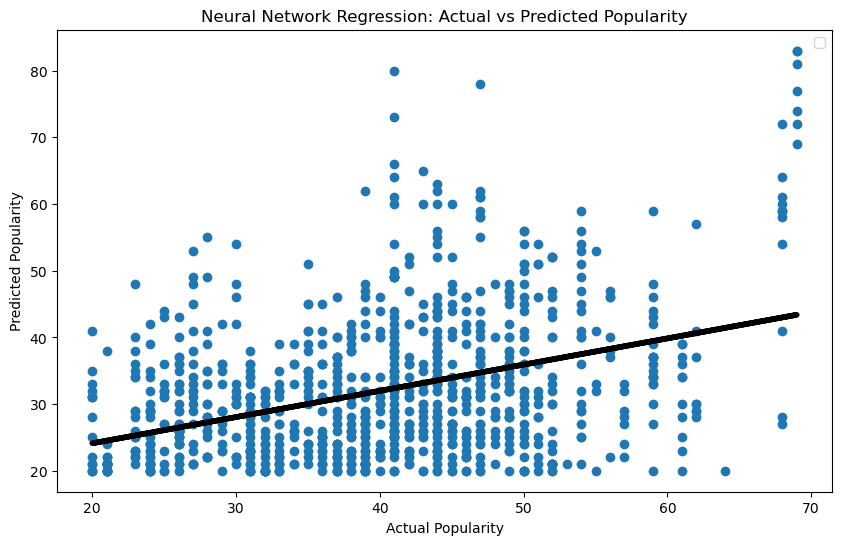

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor



# Prepare the data
df = pd.read_csv('track_data.csv')

X = df[['Artist Popularity']].fillna(0)
y = df['Song Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the neural network regressor
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = nn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_art_te, y_art_te)
plt.plot(x_art_te, art_pred, 'k', linewidth=4)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Neural Network Regression: Actual vs Predicted Popularity")
plt.legend()
plt.show()

## Visualization for Model 2

# EXPLAIN EACH SECTION!!!